# Métodos basados en interpolación lineal

Los métodos que hemos revisado de Iteración simple y de Bisección, tienen algunos problemas:

* Es posible perder raices que estén muy cercanas (si el incremento de búsqueda en $x$ es más grande que el espaciamiento entre raices)
* Una raíz degenerada, no sería detectada
* Algunas singularidades (polos) se confunden con raices. Por ejemplo $f(x)=\tan x$ cambia de signo en $x = \pm n\pi$, $n=1,3,5,\ldots$, pero estos no son ceros, la función no esta cruzando el eje $x$.



# Métodos de secante y posición falsa (*regula falsi*). 

Ambos métodos requieren valores iniciales de estimación de raices $x_1$ y $x_2$. Se asume que la función $f(x)$ es aproximadamente lineal cerca de la raíz. El valor mejorado de la raíz $x_3$ puede ser estimado por interpolación lineal entre $x_1$ y $x_2$.

<center> <div> <img src="../fig/interpol-1.jpg" alt="Drawing" style="width: 500px;"/></div>




Con los triángulos sombreados vemos que
$$
\frac{f(x_2)}{x_3-x_2} = \frac{f(x_1)-f(x_2)}{x_2-x_1},
$$
entonces el valor mejorado es
$$
x_3 = x_2 - f(x_2)\frac{x_2-x_1}{f(x_2)-f(x_1)}
$$

La convergencia de estos métodos no es tan buena como en el Método de Ridder.


# Método de Ridder. 

Es una modificación del método de regula falsa. Asumiendo que la raíz esta en el intervalo $(x_1,x_2)$, calculamos $f_3 = f(x_3)$, where $x_3$ is el punto medio, como se muestra en (a).

<center> <div> <img src="../fig/interpol-2.jpg" alt="Drawing" style="width: 500px;"/></div>

Luego se introduce el mapeo $g(x)=f(x)\mathrm{e}^{(x - x_1) Q}$ donde la constante $Q$ se determina pidiendo que los puntos $(x_1,g_1)$, $(x_2,g_2)$ y $(x_3,g_3)$ (donde $g_i=g(x_i)$) pertenezcan a una línea recta, como se muestra en (b). 

El valor mejorado de la raíz se obtiene con interpolación lineal de $g(x)$, en lugar de usar $f(x)$

¿Qué nos dice el mapeo $g(x)=f(x)\mathrm{e}^{(x - x_1) Q}$? 

Primero:
$$
g_1=f_1, ~~~~~ g_2=f_2\mathrm{e}^{2hQ}, ~~~~~ g_3 = f_3\mathrm{e}^{hQ},
$$
donde $h = (x_2 - x_1)/2$. Entonces el requerimento de que los tres puntos caigan en la misma línea nos lleva a pedir que $g_3 = (g_1 + g_2)/2$, es decir tenemos que resolver una cuadrática en $\mathrm{e}^{hQ}$
$$
f_3\mathrm{e}^{hQ} = \frac{1}{2} \left(f_1 + f_2\mathrm{e}^{2hQ}\right) \Longrightarrow \mathrm{e}^{hQ} = \frac{f_3 \pm \sqrt{f_3^2 -f_1f_2 }}{f_2}
$$

La interpolación lineal entre los puntos $(x_1,g_1)$ y $(x_3,g_3)$ ahora nos dá la raíz mejorada
$$
x_4 = x_3 - g_3 \frac{x_3 - x_1}{g_3 - g_1} = x_3 - f_3\mathrm{e}^{hQ} \frac{x_3 - x_1}{f_3\mathrm{e}^{hQ} - g_1} = x_3 \pm   \frac{f_3(x_3 - x_1)}{\sqrt{f_3^2 - f_1f_2}}~~~~~\Biggl\{ \begin{array}{c}
(+) ~\mathrm{si}~ f_1 > f_2 \\
(-) ~\mathrm{si}~ f_2 > f_1
\end{array} \Biggr.
$$

El resultado anterior nos proporciona el nuevo intervalo reducido de la raíz y se aplica de nuevo esta expresión, hasta tener el resultado con la tolerancia deseada.

Ventajas y desvantajas

* La expresión iterativa de Ridder que acabamos de obtener tiene la propiedad de que si $x_1$ y $x_2$ abarcan a la raíz, entonces $x_4$ siempre estará contenida en el intervalo $(x_1,x_2)$.
* La desventaja es que cada iteración requiere de dos evaluaciones de funciones.
* Se puede mostrar que el método de Ridder converge cuadraticamente, haciéndolo más rápido que el método de la secante o que el de regula falsi.
* Este método es el más conveniente, si tienes una función cuya derivada es difícil de calcular.


# Ejemplo 1: Método de Ridder: Encuentra el error del código! es typo del libro!

In [11]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import sign
import sys


In [12]:

def ridder(f,a,b,tol=1.0e-9):
  fa = f(a)
  if fa == 0.0: return a
  fb = f(b)
  if fb == 0.0: return b
  if sign(fa)!= sign(fb): c=a; fc=fa
  for i in range(30):
# Compute the improved root x from Ridder’s formula
      c = 0.5*(a + b); 
      fc = f(c)
      s = math.sqrt(fc**2 - fa*fb)
      if s == 0.0: return None
      dx = (c - a)*fc/s
      if (fa - fb) < 0.0: dx = -dx
      x = c + dx; fx = f(x)
# Test for convergence
  if i > 0:
     xOld = x
     if abs(x - xOld) < tol*max(abs(x),1.0): return x
# Re-bracket the root as tightly as possible
  if sign(fc) == sign(fx):
    if sign(fa)!= sign(fx): b = x; fb = fx
    else: a = x; fa = fx
  else:
    a = c; b = x; fa = fc; fb = fx
  return None
  print('Too many iterations')

# Ejemplo 2: Método de Ridder con optimize

Encuentra la raíz de la función 
$$
f(x) = \frac{1}{(x - 0.3)^2 + 0.01} - \frac{1}{(x - 0.8)^2 + 0.04}.
$$
Puedes ver la localización aproximada de la raíz en la gráfica.

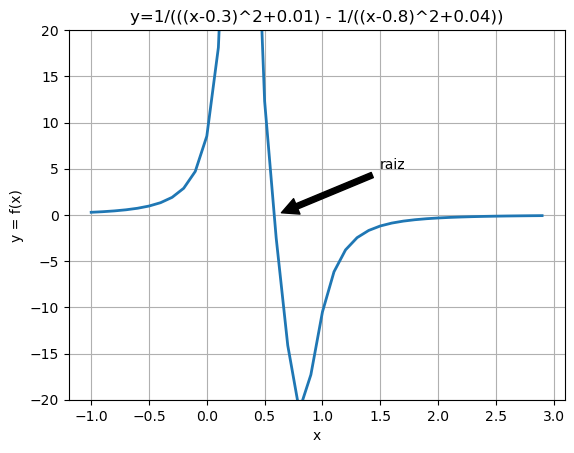

In [13]:
ax = plt.subplot(111)
t = np.arange(-1.0, 3.0, 0.1)
a = (t - 0.3)**2 + 0.01
b = (t - 0.8)**2 + 0.04
s = 1.0/a - 1.0/b
line, = plt.plot(t, s, lw=2)

plt.annotate('raiz', xy=(0.6,0.0), xytext=(1.5, 5.0),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )


plt.grid(True)
plt.ylim(-20.0, 20.0)

plt.title("y=1/(((x-0.3)^2+0.01) - 1/((x-0.8)^2+0.04))")
plt.ylabel('y = f(x)')
plt.xlabel('x')

plt.savefig('raices-ridder.png')

In [14]:
# Ejemplos de uso de Metodo de Ridder
def g(x): 
  a = (x - 0.3)**2 + 0.01
  b = (x - 0.8)**2 + 0.04
  return 1.0/a - 1.0/b
x = ridder(g,0.0,1.0)
print('La raiz es', '{:6.4f}'.format(x))

La raiz es 0.8964


# Método Newton-Raphson

La expresión usada para encontrar raices con éste método, se puede obtener a partir de la representación en Serie de Taylor de la función de interés

$$
f(x_{i+1}) = f(x_i) + f^\prime(x_i)(x_{i+1} -x_i) + \mathcal{O}\{(x_{i+1} -x_i)^2\}.
$$

Entonces, si $x_{i+1}$ es una raíz de $f(x)$, esta expresión se convierte en

$$
0 = f(x_i) + f^\prime(x_i)(x_{i+1} -x_i) + \mathcal{O}\{(x_{i+1} -x_i)^2\}.
$$

Si $x_{i+1}$ es *lo suficientemente cercana* a $x_i$, los términos de órden mayor en la diferencia van a ser nulos y podemos obtener la expresión que buscamos:

$$
f(x_i)= f^\prime(x_i)(x_{i} -x_{i+1}) 
$$

$$
\Longrightarrow x_{i+1} = x_i - \frac{f(x_i)}{f^\prime(x_i)}
$$

<center><div> <img src="../fig/nr-1.jpg" alt="Drawing" style="width: 500px;"/></div>




## Pseudocódigo

El algoritmo para el método de Newton-Raphson es simple: aplica de manera repetida la expresión que obtuvimos, comenzando con un valor inicial $x_0$, hasta que se cumpla el criterio de convergencia 
$$
|x_{i+1}-x_i| < \varepsilon,
$$
donde $\varepsilon$ es la tolerancia. Sólo se guarda el último valor de $x$ en el proceso.

## Pros y cons del Método Newton-Raphson


* es el mejor algoritmo para encontrar raices de la ecuación $f(x)=0$ puesto que es simple y rápido,
* el algoritmo usa tanto la función $f(x)$ como su derivada $f^\prime(x)$, entonces el método sirve cuando esta última puede calcularse,
* el método converge de forma cuadrática, ya que el error por truncamiento de la Serie de Taylor es
$$
E_{i+1} = - \frac{f^{\prime\prime}(x)}{2f^\prime(x)}~E_i^2,
$$
donde $x$ es la raíz. Por lo tanto, el número de cifras significativas se duplica con cada iteración,
* el método converge rápido cerca de la raíz, pero su convergencia global es pobre.

La recta tangente no es siempre una aproximación aceptable de la función, como se muestra en los ejemplos:

<center><div> <img src="../fig/nr-2.jpg" alt="Drawing" style="width: 500px;"/></div>


                    !Combínalo con bisección cuando tengas este problema, y listo!


In [15]:
## Modulo Newton-Raphson
## raiz = newtonRaphson(f,df,a,b,tol=1.0e-9).
## Encuentra la raiz de f(x) = 0 combinando Newton-Raphson
## con biseccion. La raiz debe estar en el intervalo (a,b).
## Los usuarios definen f(x) y su derivada df(x).
def err(string):
  print(string)
  input('Press return to exit')
  sys.exit()

def newtonRaphson(f,df,a,b,tol=1.0e-9):
  from numpy import sign
  fa = f(a)
  if fa == 0.0: return a
  fb = f(b)
  if fb == 0.0: return b
  if sign(fa) == sign(fb): err('La raiz no esta en el intervalo')
  x = 0.5*(a + b)
  for i in range(30):
    print(i)
    fx = f(x)
    if fx == 0.0: return x 
    if sign(fa) != sign(fx): b = x # Haz el intervalo mas pequeño
    else: a = x
    dfx = df(x)  
    try: dx = -fx/dfx # Trata un paso con la expresion de Delta x
    except ZeroDivisionError: dx = b - a # Si division diverge, intervalo afuera
    x = x + dx # avanza en x
    if (b - x)*(x - a) < 0.0: # Si el resultado esta fuera, usa biseccion
      dx = 0.5*(b - a)
      x = a + dx 
    if abs(dx) < tol*max(abs(b),1.0): return x # Checa la convergencia y sal
  print('Too many iterations in Newton-Raphson')


In [16]:
def f(x): return x**2 - 1
def df(x): return 2*x
root = newtonRaphson(f,df,-5.0,0)
print('Root =',root)

0
1
2
3
4
5
Root = -1.0


# Ejemplo3: Newton-Raphson sencillo (ejemplo con raices degeneradas)

La función
$$
f(x) = x^4 - 6.4 x^3 + 6.45 x^2 + 20.538 x - 31.752
$$
se factoriza como
$$
f(x) = 0.002 (x - 4) (5 x + 9) (10 x - 21)^2
$$

Lo cual indica que si lo volvemos un problema de búsqueda de raices $f(x)=0$, habrá una de ellas $x=2.1$ que sea degenerada.

Usa el método Newton-Raphson para encontrarla con:

* Algoritmo de clase
* Función [newton](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) de python

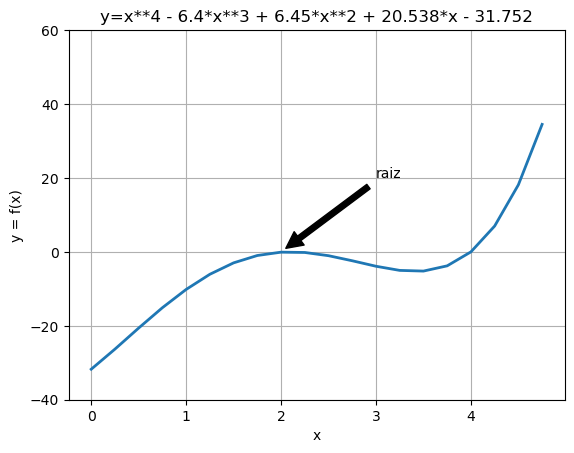

In [17]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.25)
s = t**4 - 6.4*t**3 + 6.45*t**2 + 20.538*t - 31.752
line, = plt.plot(t, s, lw=2)

plt.annotate('raiz', xy=(2.0,0.0), xytext=(3.0, 20.0),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )


plt.grid(True)
plt.ylim(-40.0, 60.0)

plt.title("y=x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752")
plt.ylabel('y = f(x)')
plt.xlabel('x')

plt.savefig('raices-nr.png')

In [18]:
def f(x): return x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752
def df(x): return 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538

def newtonRaphson(x,tol=1.0e-9):
  for i in range(30):
    dx = -f(x)/df(x)
    x = x + dx
    if abs(dx) < tol: return x,i
  print('Too many iterations\n')

def newtonRaphsonDegen(x,tol=1.0e-9):
  for i in range(30):
    dx = -2*f(x)/df(x)
    x = x + dx
    if abs(dx) < tol: return x,i
  print('Too many iterations\n')

root,numIter = newtonRaphson(2.0)
rootd,numIterd = newtonRaphsonDegen(2.0)
print('Root =',root)
print('Number of iterations =',numIter)
print('Root degen=',rootd)
print('Number of iterations degen=',numIterd)

Root = 2.0999999786199406
Number of iterations = 22
Root degen= 2.100000000014807
Number of iterations degen= 5


# Método Newton-Raphson $n$-dim

Hasta aqui, hemos abordado la solución de $f(x)= 0$. Consideremos la versión $n$-dimensional del problema $\mathbf{f}(\mathbf{x}) = \mathbf{0}$, ó escrito en sus componentes

\begin{align*}
f_1(x_1,x_2,\ldots,x_n) &=& 0 \\
f_2(x_1,x_2,\ldots,x_n) &=& 0 \\
\vdots & & \vdots \\
f_n(x_1,x_2,\ldots,x_n) &=& 0
\end{align*}

Resolver un sistema de $n$ ecuaciones no-lineales simultáneas es un problema con alta dificultad. 

El problema principal es que no existe un método seguro para aislar dentro de una región al vector solución $\mathbf{x}$. A su vez, esto genera problemas para dar un "buen" valor inicial, a menos que la Física del problema lo sugiera.

El método Newton-Raphson tiene buena convergencia global para ecuaciones simultáneas, si se le dá un "buen" valor inicial.

Para obtenerlo, de nuevo comenzamos con la representación en Serie de Taylor de la función $f_i(\mathbf{x})$ alrededor del punto $\mathbf{x}$

$$
f_i(\mathbf{x} + \mathbf{\Delta x}) = f_i(\mathbf{x}) + \sum_{j=1}^{n} \frac{\partial f_i}{\partial x_j}\Delta x_j + \mathcal{O}\{\Delta x^2\}.
$$

Si truncamos los términos $\mathcal{O}\{\Delta x^2\}$, podemos reescribir esta expresión como

$$
\mathbf{f}(\mathbf{x} + \mathbf{\Delta x}) = \mathbf{f}(\mathbf{x}) + \mathbf{J}(\mathbf{x})\mathbf{\Delta x},
$$

que representa una aproximación lineal (donde el vector $\mathbf{\Delta x}$ es la variable) de la función vectorial $\mathbf{f}$ en la vecindad de $\mathbf{x}$. Hemos introducido *la matríz Jacobiana* (de tamaño $n\times n$) cuyas entradas son las derivadas parciales

$$
J_{ij} = \frac{\partial f_i}{\partial x_j}.
$$

Consideremos que $\mathbf{x}$ es una solución aproximada al problema $\mathbf{f}(\mathbf{x})=\mathbf{0}$, y que $\mathbf{x} + \mathbf{\Delta x}$ es una solución mejorada.

Entonces para encontrar la "mejora/corrección" a la solución aproximada, tenemos que resolver la aproximación lineal anterior, de manera que 
$\mathbf{f}(\mathbf{x}+ \mathbf{\Delta x})=\mathbf{0}$. Es decir,

$$
\mathbf{J}(\mathbf{x})\mathbf{\Delta x} = - \mathbf{f}(\mathbf{x})
$$

Para obtenerlo, de nuevo comenzamos con la representación en Serie de Taylor de la función $f_i(\mathbf{x})$ alrededor del punto 

$$
f_i(\mathbf{x} + \mathbf{\Delta x}) = f_i(\mathbf{x}) + \sum_{j=1}^{n} \frac{\partial f_i}{\partial x_j}\Delta x_j + \mathcal{O}\{\Delta x^2\}.
$$

Como la derivación analítica de $\partial f_i/\partial x_j$, puede ser difícil o impráctica, podemos usar la aproximación de diferencia finita

$$
\frac{\partial f_i}{\partial x_j} \approx \frac{f_i(\mathbf{x} + \mathbf{e}_j h) - f_i(\mathbf{x})}{h}
$$
donde $h$ es un pequeño incremento de $x_j$ y $\mathbf{e}_j$ representa un vector unitario en la dirección de $\mathbf{x}_j$.

Podemos usar esta aproximación porque el Método Newton-Raphson es poco sensible a errores en $\mathbf{J}(\mathbf{x})$.

Esta aproximación tambien es útil porque no necesitamos codificar todas las entradas $\partial f_i/\partial x_j$.

# Ejemplo 4: 

Encuentra una solución para el sistema de ecuaciones no-lineales

\begin{align*}
\sin x + y^2 + \ln z - 7 &=& 0 \\
3 x + 2^y - z^3 + 1 &=& 0 \\
x + y + z - 5 &=& 0
\end{align*}


Usando el método de Newton-Raphson presentado anteriormente. Usa el valor inicial $(x, y, z) = (1, 1, 1)$.

La solución encontrada con el algoritmo desarrollado es (0.59905376 2.3959314  2.00501484).


In [19]:

import sys

def err(string):
  print(string)
  input('Press return to exit')
  sys.exit()

def swapRows(v,i,j):
  if len(v.shape) == 1:
    v[i],v[j] = v[j],v[i]
  else:
    v[[i,j],:] = v[[j,i],:]

def swapCols(v,i,j):
  v[:,[i,j]] = v[:,[j,i]]

def gaussPivot(a,b,tol=1.0e-12):

  n = len(b) 
  s = np.zeros(n)
  for i in range(n):
    s[i] = max(np.abs(a[i,:]))
  for k in range(0,n-1): 
      p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k
      if abs(a[p,k]) < tol: error.err("Matrix is singular")
      if p != k:
        swapRows(b,k,p)
        swapRows(s,k,p)
        swapRows(a,k,p)

        # Elimination
      for i in range(k+1,n):
        if a[i,k] != 0.0:
          lam = a[i,k]/a[k,k]
          a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
          b[i] = b[i] - lam*b[k]
            
  if abs(a[n-1,n-1]) < tol: error.err("Matrix is singular")

  # Back substitution
  b[n-1] = b[n-1]/a[n-1,n-1]
  for k in range(n-2,-1,-1):
    b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
  return b

def newtonRaphson2(f,x,tol=1.0e-9):
  
  def jacobian(f,x):
    h = 1.0e-4
    n = len(x)
    jac = np.zeros((n,n))
    f0 = f(x)
    for i in range(n):
      temp = x[i]
      x[i] = temp + h
      f1 = f(x)
      x[i] = temp
      jac[:,i] = (f1 - f0)/h
    return jac,f0

  for i in range(30):
    jac,f0 = jacobian(f,x)
    if math.sqrt(np.dot(f0,f0)/len(x)) < tol: return x
    dx = gaussPivot(jac,-f0)
    x = x + dx
    if math.sqrt(np.dot(dx,dx)) < tol*max(max(abs(x)),1.0):
      return x
  print("Too many iterations")



In [20]:
##### Ejemplo 4.9
def f(x):
  f = np.zeros(len(x))
  f[0] = math.sin(x[0]) + x[1]**2 + math.log(x[2]) - 7.0
  f[1] = 3.0*x[0] + 2.0**x[1] - x[2]**3 + 1.0
  f[2] = x[0] + x[1] + x[2] - 5.0
  return f

x = np.array([1.0, 1.0, 1.0])

print(newtonRaphson2(f,x))

input("\nPress return to exit")

[0.59905376 2.3959314  2.00501484]


''